In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend
from keras_tqdm import TQDMNotebookCallback
from matplotlib import rc
rc("font", family="serif", size=14)
from datetime import datetime

Using TensorFlow backend.


In [116]:
data=np.genfromtxt('grid_0_0.csv', delimiter=',', skip_header=1)
print(open('grid_0_0.csv', 'r').read().split('\n')[0].split(','))

evo_tracks=[]
last_number=-1
last_index=0
for i,entry in enumerate(data):
    if entry[0]<last_number:
        evo_tracks.append(data[last_index:i])
        last_index=i
    if i==len(data)-1:
        evo_tracks.append(data[last_index:])
    last_number=entry[0]

range_tracks=[]
for track in evo_tracks:
    range_track=[]
    for entry in track:
        if entry[3]>=1 and entry[3]<=8:
            range_track.append(entry)
    if len(range_track)>0:
        range_tracks.append(np.array(range_track))
range_tracks=np.array(range_tracks)

['', 'model_number', 'star_mass', 'star_age', 'star_feh', 'star_MLT', 'star_fov', 'effective_T', 'luminosity', 'radius', 'log_g', 'surface_h1', 'surface_he4', 'center_h1', 'center_he4', 'log_center_T', 'log_center_Rho', 'he_core_mass', 'delta_nu', 'delta_Pg', 'nu_max', 'nu_0_10', 'nu_0_11', 'nu_0_12', 'nu_0_13', 'nu_0_14', 'nu_0_15']


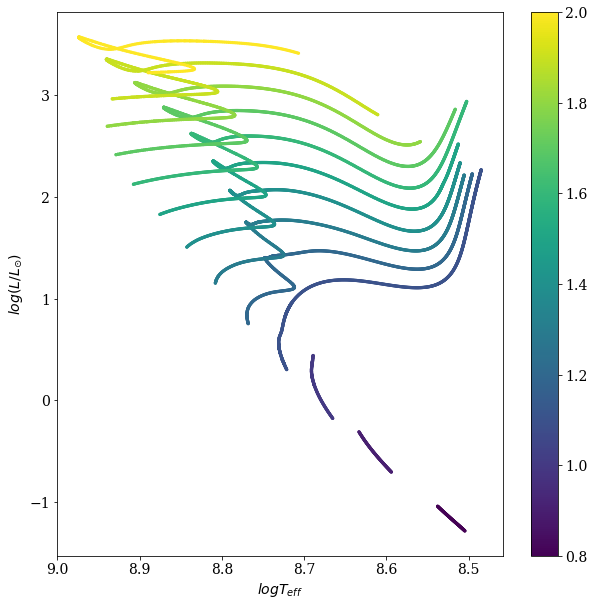

In [117]:
rc("font", family="serif", size=14)

def datatoplot(tracks):
    plot_tracks=[tracks[0][:,7],tracks[0][:,8]]
    plot_m=[tracks[0][:,2]]
    for track in tracks:
        plot_tracks[0]=np.append(plot_tracks[0],track[:,7])
        plot_tracks[1]=np.append(plot_tracks[1],track[:,8])
        plot_m=np.append(plot_m,track[:,2])
    return plot_tracks, plot_m

plot_tracks,plot_m=datatoplot(range_tracks)
fig, ax=plt.subplots(1,1,figsize=[10,10])
#print(np.ones(10)*np.array([1,2]))
s1=ax.scatter(np.log(plot_tracks[0]),np.log(plot_tracks[1]),s=5,c=plot_m,cmap='viridis')
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylabel(r'$log(L/L_{\odot})$')
ax.set_xlabel(r'$log T_{eff}$')
fig.colorbar(s1)
plt.show()

In [121]:
np.shape(data[0])==[27,]

False